In [12]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [40]:
x, y = make_blobs(n_samples=2000, centers=3, n_features=5, cluster_std=1.5, random_state=2)

In [41]:
df = pd.DataFrame(x)
df

,0,1,2,3,4
0,-1.244852,-9.112637,2.183669,-2.023166,-1.351262
1,-0.682735,-7.992280,2.177245,-0.438400,-3.141359
2,-2.618118,-4.854426,2.197459,-1.864361,-4.311947
3,2.880403,2.130902,-6.496691,3.281046,-6.837910
4,-1.466544,-9.867771,2.609239,-1.571378,0.155062
...,...,...,...,...,...
1995,-3.231743,-12.021972,2.767073,-0.007571,-0.935848
1996,-0.098745,-8.799511,1.236538,0.587827,1.509718
1997,-0.456811,-9.404179,3.073827,2.449229,-1.502100
1998,-3.538422,-5.372192,3.327116,-5.859133,-7.821249


In [42]:
df.describe()

,0,1,2,3,4
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.790486,-4.965014,-1.332422,-1.663105,-4.158391
std,2.835795,4.425038,4.554414,2.337711,2.478194
min,-8.585162,-13.730730,-11.461209,-9.420152,-11.451672
25%,-3.026011,-8.658548,-6.431887,-3.424154,-6.079813
50%,-1.123243,-5.961293,0.568423,-1.483272,-4.398024
75%,1.473632,-0.502273,2.198277,0.011818,-2.359991
max,7.747904,4.313292,7.539517,5.762647,3.050941


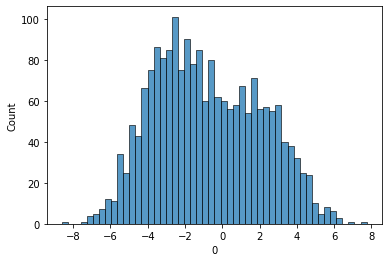

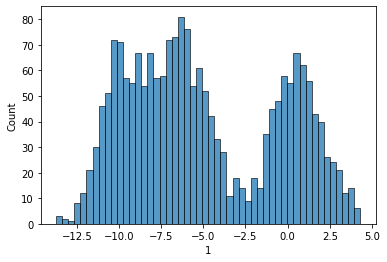

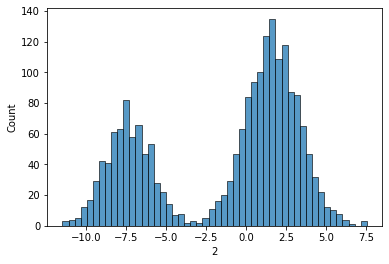

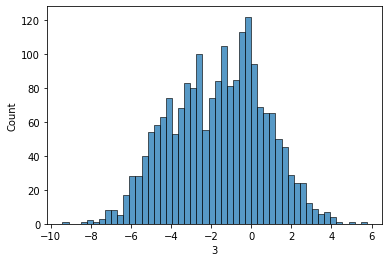

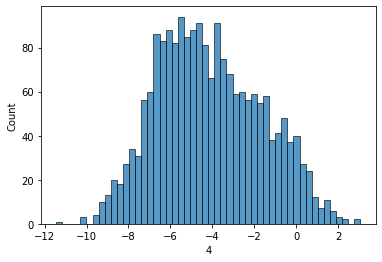

In [43]:
for col in df.columns:
    sns.histplot(df, x=col, bins=50)
    plt.show()

In [90]:
db = DBSCAN(eps=2.8, min_samples=10)
clt = db.fit(x)
clusters = np.unique(clt.labels_)

In [80]:
db.get_params()

{'algorithm': 'auto',
 'eps': 5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 10,
 'n_jobs': None,
 'p': None}

In [91]:
df['dbscan_clusters'] = clt.labels_
df['dbscan_clusters'].value_counts()

 0    1327
 1     657
-1      16
Name: dbscan_clusters, dtype: int64

In [58]:
clusters

array([DBSCAN(eps=2, min_samples=8)], dtype=object)

In [56]:
pd.Series(db.labels_).value_counts()

 0    1220
 1     602
-1     178
dtype: int64

In [92]:
db.labels_

array([0, 0, 0, ..., 0, 0, 1])

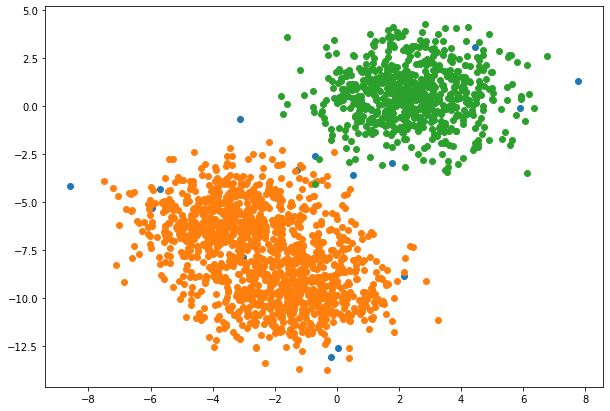

In [96]:
fig= plt.figure(figsize=(10,7))
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(clt.labels_ == cluster)
    # create scatter of these samples
    plt.scatter(x[row_ix, 0], x[row_ix, 1])
# show the plot
plt.show()

In [97]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)
kmeans.labels_


array([0, 0, 2, ..., 0, 2, 1], dtype=int32)

In [98]:
df.columns

Index([0, 1, 2, 3, 4, 'dbscan_clusters'], dtype='object')

In [99]:
df

,0,1,2,3,4,dbscan_clusters
0,-1.244852,-9.112637,2.183669,-2.023166,-1.351262,0
1,-0.682735,-7.992280,2.177245,-0.438400,-3.141359,0
2,-2.618118,-4.854426,2.197459,-1.864361,-4.311947,0
3,2.880403,2.130902,-6.496691,3.281046,-6.837910,1
4,-1.466544,-9.867771,2.609239,-1.571378,0.155062,0
...,...,...,...,...,...,...
1995,-3.231743,-12.021972,2.767073,-0.007571,-0.935848,0
1996,-0.098745,-8.799511,1.236538,0.587827,1.509718,0
1997,-0.456811,-9.404179,3.073827,2.449229,-1.502100,0
1998,-3.538422,-5.372192,3.327116,-5.859133,-7.821249,0


In [103]:
df['kmeans_clusters'] = kmeans.fit_predict(df[[0,1,2,3,4]])
df

,0,1,2,3,4,dbscan_clusters,kmeans_clusters
0,-1.244852,-9.112637,2.183669,-2.023166,-1.351262,0,0
1,-0.682735,-7.992280,2.177245,-0.438400,-3.141359,0,0
2,-2.618118,-4.854426,2.197459,-1.864361,-4.311947,0,2
3,2.880403,2.130902,-6.496691,3.281046,-6.837910,1,1
4,-1.466544,-9.867771,2.609239,-1.571378,0.155062,0,0
...,...,...,...,...,...,...,...
1995,-3.231743,-12.021972,2.767073,-0.007571,-0.935848,0,0
1996,-0.098745,-8.799511,1.236538,0.587827,1.509718,0,0
1997,-0.456811,-9.404179,3.073827,2.449229,-1.502100,0,0
1998,-3.538422,-5.372192,3.327116,-5.859133,-7.821249,0,2


<AxesSubplot:xlabel='0', ylabel='1'>

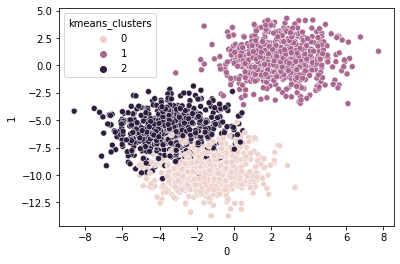

In [104]:
sns.scatterplot(x = 0 ,y = 1, hue= 'kmeans_clusters', data = df)

In [105]:
df.groupby('dbscan_clusters')['kmeans_clusters'].value_counts()

dbscan_clusters  kmeans_clusters
-1               1                    9
                 0                    4
                 2                    3
 0               2                  665
                 0                  662
 1               1                  657
Name: kmeans_clusters, dtype: int64